<a href="https://colab.research.google.com/github/Hyubbbb/EPOCH_LinearAlgebra/blob/main/h_Jiyun/Chapter10_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

## [Problem 10-1]

In [104]:
# 변수 생성
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

X = np.hstack((np.ones((20,1)),np.array(numcourses, ndmin=2).T))

# 왼쪽 역을 계산
X_leftinv = np.linalg.inv(X.T@X) @ X.T

# 계수 구하기
beta = X_leftinv @ happiness

pred_happiness = X@beta

# 잔차
res = happiness - pred_happiness

# SSE
SSE = sum((res)**2)

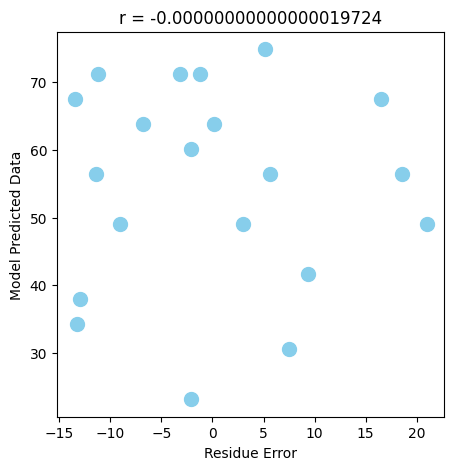

In [105]:
# 시각화
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(res, pred_happiness,'o', markersize=10, color='skyblue')

plt.xlabel('Residue Error')
plt.ylabel('Model Predicted Data')
plt.title(f'r = {np.corrcoef(res, pred_happiness)[0,1]:.20f}') # f'': f-string으로 문자열 안에 함수 호출
plt.show()

In [106]:
# 잔차와 모델 예측 데이터 사이의 내적
np.dot(res,pred_happiness)

-5.752553988713771e-11

In [107]:
# 잔차와 모델 예측 데이터 사이의 상관계수
np.corrcoef(res, pred_happiness)

array([[ 1.00000000e+00, -1.97243138e-16],
       [-1.97243138e-16,  1.00000000e+00]])

* 내적

-5.752553988713771e-11


* 상관계수


([[1.00000000e+00, -1.97243138e-16],

   [-1.97243138e-16, 1.00000000e+00]])

> *상관계수가 더 작다. 이유는 .. 왜 ?*

## [Problem 10-2]

In [108]:
# 정답코드


# the residual is orthogonal to the entire column space of the design matrix.

# I demonstrated this by showing that the residuals vector is in the left-null space of the design matrix.
# I did that by using scipy.linalg.null_space to find the left-null space, augmenting that null-space basis
# matrix by the residuals vector, and showing that the null space and augmented null space have the same rank.


# X.T를 0으로 만드는 집합 - Null space 생성
nullspace = scipy.linalg.null_space(X.T)


# hstack : 가로 쌓기
nullspaceAugment = np.hstack( (nullspace,res.reshape(-1,1)) ) # reshape(-1,1)에서 -1은 열의 수를 지정하면 행의 수는 알아서 지정된다는 의미


# print their ranks
print(f'dim(  N(X)    ) = {np.linalg.matrix_rank(nullspace)}')
print(f'dim( [N(X)|r] ) = {np.linalg.matrix_rank(nullspaceAugment)}')

dim(  N(X)    ) = 18
dim( [N(X)|r] ) = 18


## [Problem 10-4]

In [109]:
# 변수 생성
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness1  = [170,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70] # 첫번째 데이터 이상치
happiness2  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,170] # 마지막 데이터 이상치

X = np.hstack((np.ones((20,1)),np.array(numcourses, ndmin=2).T))

# 왼쪽 역을 계산
X_leftinv = np.linalg.inv(X.T@X) @ X.T

# 계수 구하기
beta = X_leftinv @ happiness
pred_happiness = X@beta

beta1 = X_leftinv @ happiness1
pred_happiness1 = X@beta1

beta2 = X_leftinv @ happiness2
pred_happiness2 = X@beta2

# 잔차
res = happiness - pred_happiness
res1 = happiness1 - pred_happiness1
res2 = happiness2 - pred_happiness2

# SSE
SSE = sum((res)**2)
SSE1 = sum((res1)**2)
SSE2 = sum((res2)**2)

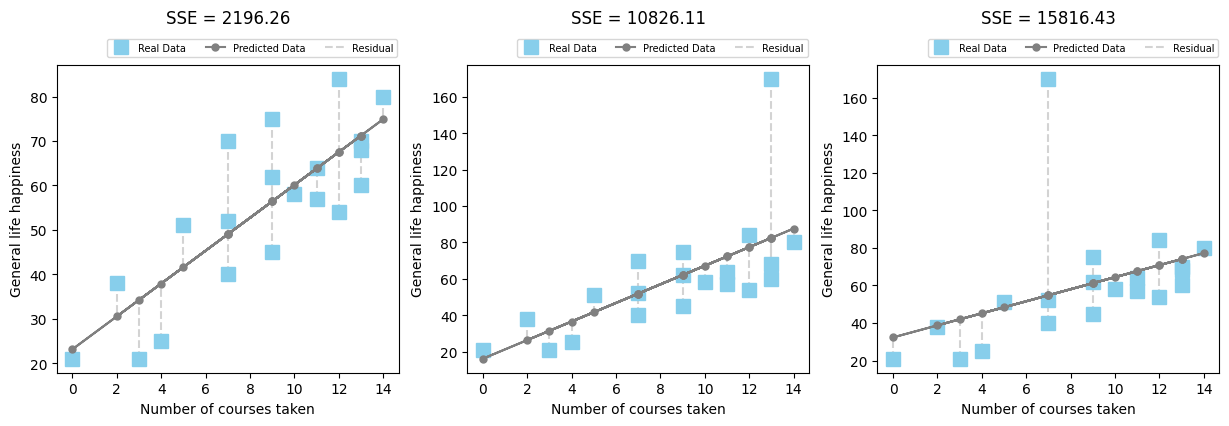

In [110]:
fig, ax = plt.subplots(1,3, figsize=(15,4))

# 원본 데이터 시각화
plt.subplot(1,3,1)
plt.plot(numcourses, happiness,'s', markersize=10, color='skyblue')
plt.plot(numcourses, X@beta, color='gray', marker='o', markersize=5)

# residual
for n,y,yHat in zip(numcourses,happiness,pred_happiness):
  plt.plot([n,n],[y,yHat],'--',color= 'lightgray',zorder=-10) # zorder 레이어 순서


plt.legend(['Real Data', 'Predicted Data', 'Residual'], loc='lower right', bbox_to_anchor=(1.01,1.01), ncols=3, fontsize=7)
plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.title(f'SSE = {round(SSE,2)}', pad=30) # f'': f-string으로 문자열 안에 함수 호출



# 첫번째 데이터 이상치
plt.subplot(1,3,2)
plt.plot(numcourses, happiness1,'s', markersize=10, color='skyblue')
plt.plot(numcourses, X@beta1, color='gray', marker='o', markersize=5)

# residual
for n,y,yHat in zip(numcourses,happiness1,pred_happiness1):
  plt.plot([n,n],[y,yHat],'--',color= 'lightgray',zorder=-10) # zorder 레이어 순서


plt.legend(['Real Data', 'Predicted Data', 'Residual'], loc='lower right', bbox_to_anchor=(1.01,1.01), ncols=3, fontsize=7)
plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.title(f'SSE = {round(SSE1,2)}',pad=30) # f'': f-string으로 문자열 안에 함수 호출



# 마지막 데이터 이상치
plt.subplot(1,3,3)
plt.plot(numcourses, happiness2,'s', markersize=10, color='skyblue')
plt.plot(numcourses, X@beta2, color='gray', marker='o', markersize=5)

# residual
for n,y,yHat in zip(numcourses,happiness2,pred_happiness2):
  plt.plot([n,n],[y,yHat],'--',color= 'lightgray',zorder=-10) # zorder 레이어 순서


plt.legend(['Real Data', 'Predicted Data', 'Residual'], loc='lower right', bbox_to_anchor=(1.01,1.01), ncols=3, fontsize=7)
plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.title(f'SSE = {round(SSE2,2)}', pad=30) # f'': f-string으로 문자열 안에 함수 호출

plt.show()